# 4. 月別売上推移、曜日別・季節別の傾向分析

## 4.1 データの読み込み

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import japanize_matplotlib
import matplotlib.ticker as mtick

In [2]:
# データ読み込み
df = pd.read_csv("../data/customer_shopping_data_2022.csv")

# 「invoice_date」を日付型に変換
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce")

In [3]:
# 先頭確認
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_amount
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00
1,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,7502.00
2,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,40.66
3,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,2022-12-25,Metrocity,20.92
4,I139207,C191708,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall,15.15


## 4.2 データ集計準備

### 4.2.1 「月」列を作成

In [12]:
# 月列の作成
df["month"] = df["invoice_date"].dt.month
# 確認
df["month"].value_counts().sort_index()

1     3842
2     3445
3     3927
4     3738
5     3852
6     3788
7     3870
8     3881
9     3752
10    3917
11    3722
12    3817
Name: month, dtype: int64

### 4.2.2 「曜日」列を作成

In [26]:
# 曜日列の作成
weekday_map = {
    0: "月",
    1: "火",
    2: "水",
    3: "木",
    4: "金",
    5: "土",
    6: "日"
}
df["weekday"] = df["invoice_date"].dt.weekday.map(weekday_map)
# 確認
weekday_order = ["月", "火", "水", "木", "金", "土", "日"]
df["weekday"].value_counts().reindex(weekday_order)

月    6580
火    6473
水    6352
木    6496
金    6562
土    6622
日    6466
Name: weekday, dtype: int64

### 4.2.3 「季節」列を作成

In [34]:
# 季節列の作成
def get_season(month):
    if month in [3, 4, 5]:
        return "春"
    elif month in [6, 7, 8]:
        return "夏"
    elif month in [9, 10, 11]:
        return "秋"
    else:
        return "冬"
df["season"] = df["month"].apply(get_season)
# 確認
season_order = ["春", "夏", "秋", "冬"]
df["season"].value_counts().reindex(season_order)

春    11517
夏    11539
秋    11391
冬    11104
Name: season, dtype: int64

## 4.3 月別、曜日別、季節別にデータを集計

### 4.3.1 月別に売上高と取引件数を集計

In [46]:
# 月別
monthly_summary = df.groupby("month").agg(
    total_sales = ("total_amount", "sum"),
    transaction_count = ("invoice_no", "count"))
# 確認
monthly_summary

,total_sales,transaction_count
month,,
1,9917602.79,3842
2,8594168.17,3445
3,9862725.13,3927
4,9616818.11,3738
5,9902187.05,3852
6,9727219.72,3788
7,9662190.26,3870
8,9408352.51,3881
9,9603433.46,3752


### 4.3.2 曜日別に売上高と取引件数を集計

In [37]:
# 曜日別
weekday_summary = df.groupby("weekday").agg(
    total_sales = ("total_amount", "sum"),
    transaction_count = ("invoice_no", "count")).reindex(weekday_order)
# 確認
weekday_summary

,total_sales,transaction_count
weekday,,
月,17140947.58,6580
火,16010539.66,6473
水,16558151.84,6352
木,16547003.44,6496
金,16618020.88,6562
土,16805677.39,6622
日,15756473.29,6466


### 4.3.3 季節別に売上高と取引件数を集計

In [39]:
# 季節別
season_summary = df.groupby("season").agg(
    total_sales = ("total_amount", "sum"),
    transaction_count = ("invoice_no", "count")).reindex(season_order)
# 確認
season_summary

,total_sales,transaction_count
season,,
春,29381730.29,11517
夏,28797762.49,11539
秋,28830620.84,11391
冬,28426700.46,11104


## 4.4 棒グラフで可視化・画像を保存

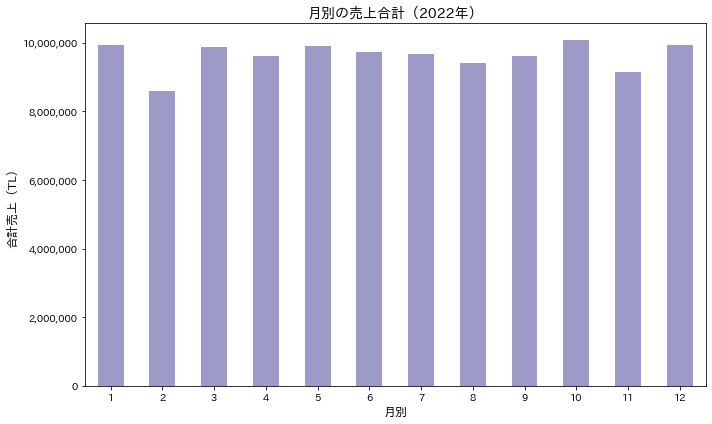

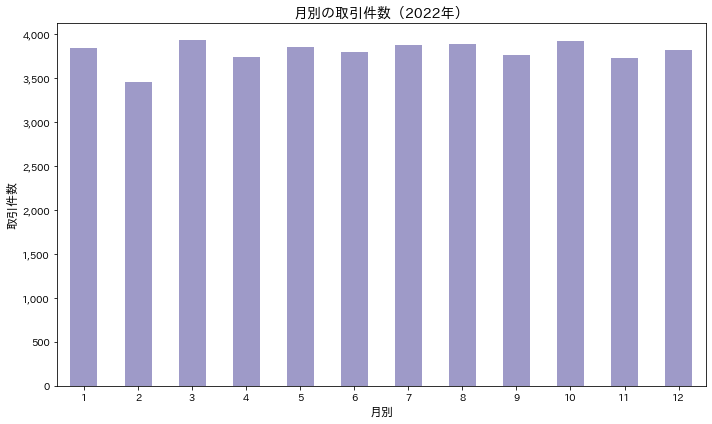

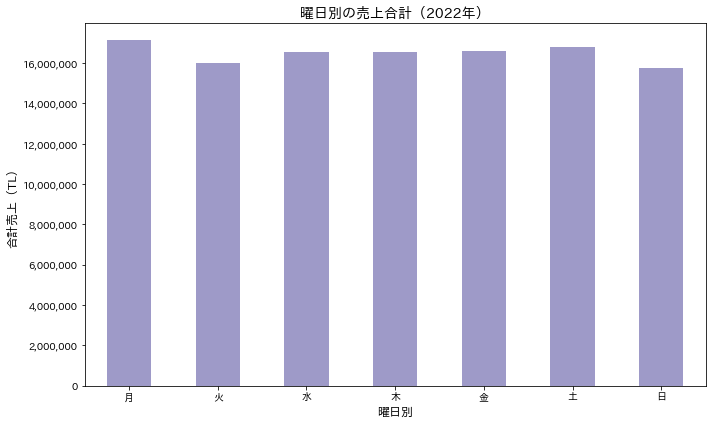

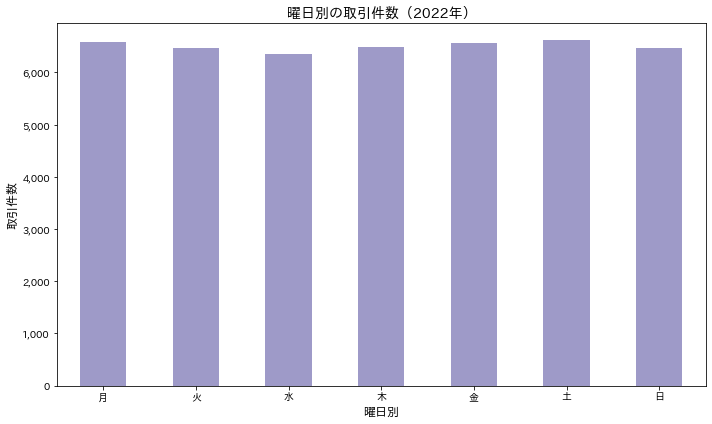

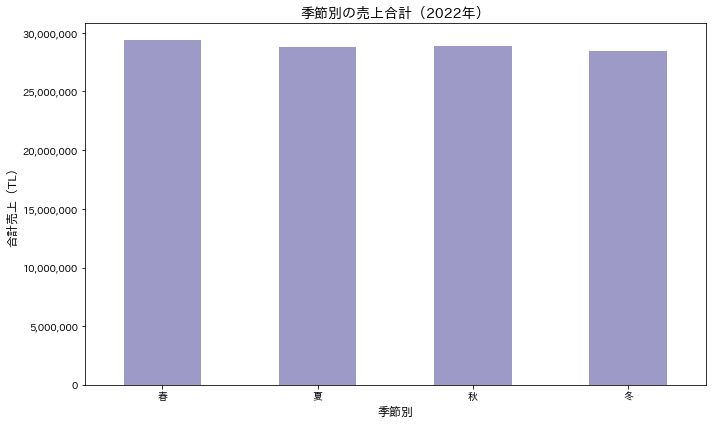

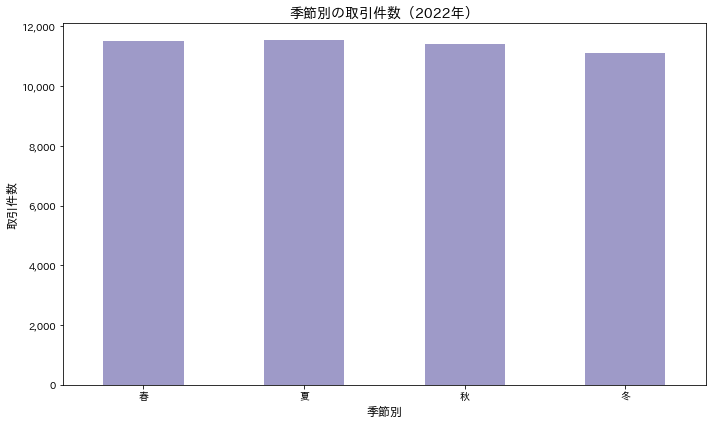

In [45]:
# グラフによる可視化

# 共通設定
figsize = (10, 6)
formatter = mtick.FuncFormatter(lambda x, _: f"{int(x):,}")

# 描画対象とファイル番号の定義
plot_targets = [
    ("monthly_summary", "month", "月別"),
    ("weekday_summary", "weekday", "曜日別"),
    ("season_summary", "season", "季節別")
]

# 通し番号のスタート
plot_cols = ["total_sales", "transaction_count"]
base_fig_num = 10

# 実行
for i, (df_name, x_label, title_prefix) in enumerate(plot_targets):
    df_obj = eval(df_name)
    for j, col in enumerate(plot_cols):
        fig_num = base_fig_num + i * 2 + j  # 通し番号 10〜15

        fig, ax = plt.subplots(figsize=figsize, facecolor="white")
        df_obj[col].plot(kind="bar", color="#9e9ac8", ax=ax)

        ax.set_title(f"{title_prefix}の{ '売上合計' if col == 'total_sales' else '取引件数' }（2022年）", fontsize=14)
        ax.set_xlabel(title_prefix, fontsize=12)
        ax.set_ylabel("合計売上（TL）" if col == "total_sales" else "取引件数", fontsize=12)
        ax.yaxis.set_major_formatter(formatter)
        ax.tick_params(axis="x", rotation=0)

        plt.tight_layout()
        plt.show()

        # 保存
        fig.savefig(f"../output/{fig_num:02d}_{x_label}_{col}.png", dpi=300, bbox_inches="tight")


## 時間軸に基づく売上・取引件数の傾向分析（2022年）

このセクションでは、取引日の情報をもとに、以下の3つの時間的視点から売上および取引件数の傾向を可視化・分析した：

- 月別（1月〜12月）
- 曜日別（週7日）
- 季節別（春・夏・秋・冬）

### 考察メモ

- **月別分析**では、2月と11月の売上がやや落ち込む傾向にあることが分かった。それ以外の月では、特に大きな偏りは見られず、同程度の水準で推移している事が分かった。
- **曜日別分析**では、月曜が売上のピークとみられ、その後はゆるやかに推移し、日曜日に売り上げがやや落ち込む傾向が見られた。
- **季節別分析**では、3月から5月にかけての春季にて最も売上・取引件数ともに高いが、こちらもあまり大きな偏りは確認されなかった。

分析の結果、月、曜日、季節といった因子は売上や取引件数にある程度影響を及ぼしているものの、取り立てて注目するべき偏りは無く、安定して推移しているという事が分かった。

### 保存ファイル

- グラフ画像は `output/` ディレクトリに、通し番号付きファイル名で保存済み（10〜15）
